## This is joined notebook for all analyses done for Group 5

# Austin Area Real Estate Development Since 2013



In [22]:
# dependencies
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import gmaps
import numpy as np

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

# csv path saved to variable-- will need to change the final directory
# data = "../Resources/Construction_Permits_Issued_since_2010.csv"

# alternative csv path-- reading in from desktop
data = "~/Desktop/Construction_Permits_Issued_since_2010.csv"

# Read and display the CSV with Pandas
development_data_pd = pd.read_csv(data)

# filter to past 5 years
filtered_5y_DF = development_data_pd.loc[development_data_pd['CalendarYearIssued'] >= 2013, : ]

C:\Users\zmsub\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,26,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
# Reduce data points
reduced_5yr_DF = filtered_5y_DF[[
    'Description',
    'PermitTypeDesc', 
    'PermitClass', 
    'WorkClass', 
    'Condominium', 
    'IssuedDate', 
    'CalendarYearIssued', 
    'StatusCurrent',
    'OriginalAddress1',
    'OriginalCity',
    'OriginalZip',
    'ProjectID',
    'Latitude',
    'Longitude',
    'Location']]

# filter data to 'StatusSurrent = Final' for analyses of ACTIVE OR COMPLETED PROJECTS
# reset index and drop original index
filter_status = reduced_5yr_DF.loc[(reduced_5yr_DF['StatusCurrent'] == 'Final') | (reduced_5yr_DF['StatusCurrent'] == 'Active'), : ].reset_index(drop=True)

# filtered out 'sign permits'
final_5y_DF = filter_status.loc[filter_status['PermitClass'] != 'Sign Permit', : ]

# re-code 'permitClass' to standardized values
# this creates 1 new series coded with T/F for 'begins with C'
final_5y_DF['PermitClass_Commercial'] = final_5y_DF.PermitClass.str.startswith('C')
final_5y_DF['PermitClass_Residential'] = final_5y_DF.PermitClass.str.startswith('R')



C:\Users\zmsub\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zmsub\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Permit Status Types for Commercial Projects in Austin since 2013

C:\Users\zmsub\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,26,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\zmsub\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\zmsub\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

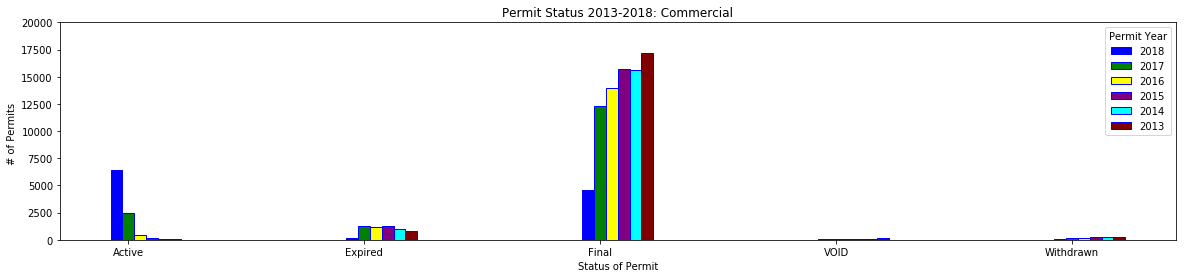

In [26]:
# Read and display the CSV with Pandas
development_data_pd = pd.read_csv(data, encoding = "utf-8")

# filter to past 5 years for each year of interest
filtered_5y_DF18 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2018, : ]
filtered_5y_DF17 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2017, : ]
filtered_5y_DF16 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2016, : ]
filtered_5y_DF15 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2015, : ]
filtered_5y_DF14 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2014, : ]
filtered_5y_DF13 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2013, : ]

# Reduce data points to dataframes by year
reducedpermit_5yr_DF18 = filtered_5y_DF18[[
    'CalendarYearIssued',
    'PermitClass', 
    'StatusCurrent']]
reducedpermit_5yr_DF17 = filtered_5y_DF17[[
     'CalendarYearIssued',
     'PermitClass', 
     'StatusCurrent']]
reducedpermit_5yr_DF16 = filtered_5y_DF16[[
     'CalendarYearIssued',
     'PermitClass', 
     'StatusCurrent']]
reducedpermit_5yr_DF15 = filtered_5y_DF15[[
    'CalendarYearIssued',
    'PermitClass', 
    'StatusCurrent']]
reducedpermit_5yr_DF14 = filtered_5y_DF14[[
     'CalendarYearIssued',
     'PermitClass', 
     'StatusCurrent']]
reducedpermit_5yr_DF13 = filtered_5y_DF13[[
     'CalendarYearIssued',
     'PermitClass', 
     'StatusCurrent']]

def residential (row):
    if str(row)[0] == 'C':
        return 'Commercial'
    if str(row)[0] == 'R':
        return 'Residential'

reducedpermit_5yr_DF18.loc[:,'Permit'] = reducedpermit_5yr_DF18.PermitClass.apply(lambda row: residential(row))
reducedpermit_5yr_DF17.loc[:,'Permit'] = reducedpermit_5yr_DF17.PermitClass.apply(lambda row: residential(row))
reducedpermit_5yr_DF16.loc[:,'Permit'] = reducedpermit_5yr_DF16.PermitClass.apply(lambda row: residential(row))
reducedpermit_5yr_DF15.loc[:,'Permit'] = reducedpermit_5yr_DF15.PermitClass.apply(lambda row: residential(row))
reducedpermit_5yr_DF14.loc[:,'Permit'] = reducedpermit_5yr_DF14.PermitClass.apply(lambda row: residential(row))
reducedpermit_5yr_DF13.loc[:,'Permit'] = reducedpermit_5yr_DF13.PermitClass.apply(lambda row: residential(row))

# get list of values for each year of interest 2018, 2017, 2016 commercial Permit Status

little_reducedpermit_5yr_DF18c = reducedpermit_5yr_DF18.loc[reducedpermit_5yr_DF18['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF18c = little_reducedpermit_5yr_DF18c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF18c = little_reducedpermit_5yr_DF18c.loc[little_reducedpermit_5yr_DF18c['Permit'] >= 10]
x_axis = little_reducedpermit_5yr_DF18c['StatusCurrent'].tolist()
y_axis18c = little_reducedpermit_5yr_DF18c['Permit'].tolist()


little_reducedpermit_5yr_DF17c = reducedpermit_5yr_DF17.loc[reducedpermit_5yr_DF17['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF17c = little_reducedpermit_5yr_DF17c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF17c = little_reducedpermit_5yr_DF17c.loc[little_reducedpermit_5yr_DF17c['Permit'] >= 10]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis17c = little_reducedpermit_5yr_DF17c['Permit'].tolist()

little_reducedpermit_5yr_DF16c = reducedpermit_5yr_DF16.loc[reducedpermit_5yr_DF16['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF16c = little_reducedpermit_5yr_DF16c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF16c = little_reducedpermit_5yr_DF16c.loc[little_reducedpermit_5yr_DF16c['Permit'] >= 10]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis16c = little_reducedpermit_5yr_DF16c['Permit'].tolist()

little_reducedpermit_5yr_DF15c = reducedpermit_5yr_DF15.loc[reducedpermit_5yr_DF15['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF15c = little_reducedpermit_5yr_DF15c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF15c = little_reducedpermit_5yr_DF15c.loc[little_reducedpermit_5yr_DF15c['Permit'] >= 10]
x_axis = little_reducedpermit_5yr_DF15c['StatusCurrent'].tolist()
y_axis15c = little_reducedpermit_5yr_DF15c['Permit'].tolist()


little_reducedpermit_5yr_DF14c = reducedpermit_5yr_DF14.loc[reducedpermit_5yr_DF14['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF14c = little_reducedpermit_5yr_DF14c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF14c = little_reducedpermit_5yr_DF14c.loc[little_reducedpermit_5yr_DF14c['Permit'] >= 10]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis14c = little_reducedpermit_5yr_DF14c['Permit'].tolist()

little_reducedpermit_5yr_DF13c = reducedpermit_5yr_DF13.loc[reducedpermit_5yr_DF13['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF13c = little_reducedpermit_5yr_DF13c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF13c = little_reducedpermit_5yr_DF13c.loc[little_reducedpermit_5yr_DF13c['Permit'] >= 10]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis13c = little_reducedpermit_5yr_DF13c['Permit'].tolist()

import matplotlib.colors

# Build the plots for new permits by calendar year issued and remodel permits by calendar year issued
N = 5
ind = np.arange(N)
cmaps = ['Blue', 'Green', 'Yellow', 'Purple', 'Aqua','Maroon']


# Set plot size
plt.figure(figsize=(20, 4))

#label for x-axis
plt.xlabel("Status of Permit")
#label for y-axis
plt.ylabel("# of Permits ")
# Set with of bar
width = 0.05       # the width of the bars

permitStatus_2018c  = plt.bar(ind-width, y_axis18c, width, color=cmaps[0], align = "center", label="2018", edgecolor='blue')
permitStatus_2017c  = plt.bar(ind, y_axis17c, width,align="center", color=cmaps[1], label="2017", edgecolor='blue')
permitStatus_2016c  = plt.bar(ind + (1*width), y_axis16c, width, color=cmaps[2], align="center", edgecolor='blue', label="2016")
permitStatus_2015c = plt.bar(ind + (2*width), y_axis15c, width, color=cmaps[3], align="center", label="2015", edgecolor='blue')
permitStatus_2014c = plt.bar(ind + (3*width), y_axis14c, width, color=cmaps[4], align="center", label="2014", edgecolor='blue')
permitStatus_2013c = plt.bar(ind + (4*width), y_axis13c, width, color=cmaps[5], align="center", edgecolor='blue', label="2013")

# add title to legend and location
lgnd = plt.legend(handles = [permitStatus_2018c, permitStatus_2017c, permitStatus_2016c, permitStatus_2015c, permitStatus_2014c, permitStatus_2013c], loc="upper right", title="Permit Year")
plt.xticks(ind,x_axis)

# make title
plt.title("Permit Status 2013-2018: Commercial")

# The y limits of our plot is to 0 to 15000
plt.ylim(0, 20000)
#plt.autoscale(tight=True)


# Save Figure
plt.savefig("Permits_Status_5yr_commercial.png")

## Permit Status Types for Residential Projects in Austin since 2013

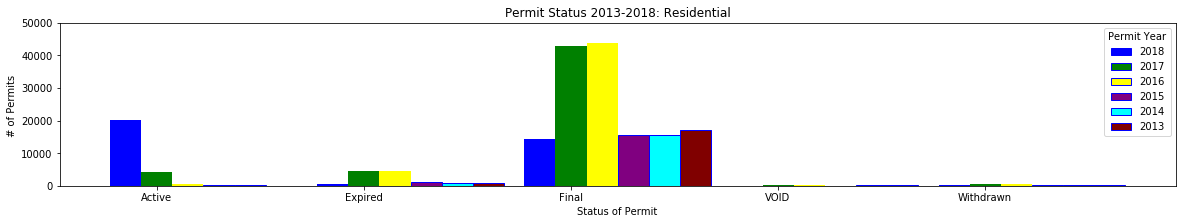

In [27]:
# Set up values for Residental Permit Status 2018-13
little_reducedpermit_5yr_DF18r = reducedpermit_5yr_DF18.loc[reducedpermit_5yr_DF18['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF18r = little_reducedpermit_5yr_DF18r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF18r = little_reducedpermit_5yr_DF18r.loc[little_reducedpermit_5yr_DF18r['Permit'] >= 38]
x_axis = little_reducedpermit_5yr_DF18r['StatusCurrent'].tolist()
y_axis18r = little_reducedpermit_5yr_DF18r['Permit'].tolist()


little_reducedpermit_5yr_DF17r = reducedpermit_5yr_DF17.loc[reducedpermit_5yr_DF17['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF17r = little_reducedpermit_5yr_DF17r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF17r = little_reducedpermit_5yr_DF17r.loc[little_reducedpermit_5yr_DF17r['Permit'] >= 25]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis17r = little_reducedpermit_5yr_DF17r['Permit'].tolist()

little_reducedpermit_5yr_DF16r = reducedpermit_5yr_DF16.loc[reducedpermit_5yr_DF16['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF16r = little_reducedpermit_5yr_DF16r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF16r = little_reducedpermit_5yr_DF16r.loc[little_reducedpermit_5yr_DF16r['Permit'] >= 20]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis16r = little_reducedpermit_5yr_DF16r['Permit'].tolist()

little_reducedpermit_5yr_DF15r = reducedpermit_5yr_DF15.loc[reducedpermit_5yr_DF15['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF15r = little_reducedpermit_5yr_DF15r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF15r = little_reducedpermit_5yr_DF15r.loc[little_reducedpermit_5yr_DF15r['Permit'] >= 38]
x_axis = little_reducedpermit_5yr_DF15r['StatusCurrent'].tolist()
y_axis15r = little_reducedpermit_5yr_DF15r['Permit'].tolist()


little_reducedpermit_5yr_DF14r = reducedpermit_5yr_DF14.loc[reducedpermit_5yr_DF14['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF14r = little_reducedpermit_5yr_DF14r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF14r = little_reducedpermit_5yr_DF14r.loc[little_reducedpermit_5yr_DF14r['Permit'] >= 25]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis14r = little_reducedpermit_5yr_DF14r['Permit'].tolist()

little_reducedpermit_5yr_DF13r = reducedpermit_5yr_DF13.loc[reducedpermit_5yr_DF13['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF13r = little_reducedpermit_5yr_DF13r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF13r = little_reducedpermit_5yr_DF13r.loc[little_reducedpermit_5yr_DF13r['Permit'] >= 20]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis13r = little_reducedpermit_5yr_DF13r['Permit'].tolist()

# Build the plots for new permits by calendar year issued and remodel permits by calendar year issued
N = 5
ind = np.arange(N)
# x-axis for the two different scatter plots should be years_list
# y-axis for the two different scatter plots should be new_permits_completed_by_year and remodel_permits_completed_by_year
plt.figure(figsize=(20, 3))
#label for x-axis
plt.xlabel("Status of Permit")
#label for y-axis
plt.ylabel("# of Permits ")

width = 0.15       # the width of the bars

# plot the data from each year on plot
permitStatus_2018r  = plt.bar(ind-width, y_axis18r, width, color=cmaps[0], align="center", label="2018")
permitStatus_2017r  = plt.bar(ind, y_axis17r, width, color=cmaps[1], align="center", label="2017")
permitStatus_2016r  = plt.bar(ind + (1*width), y_axis16r, width, color=cmaps[2], align="center", label="2016")
permitStatus_2015r = plt.bar(ind + (2*width), y_axis15c, width, color=cmaps[3], align="center", label="2015", edgecolor='blue')
permitStatus_2014r = plt.bar(ind + (3*width), y_axis14c, width, color=cmaps[4], align="center", label="2014", edgecolor='blue')
permitStatus_2013r = plt.bar(ind + (4*width), y_axis13c, width, color=cmaps[5], align="center", edgecolor='blue', label="2013")

# add title to legend and location
lgnd = plt.legend(handles = [permitStatus_2018c, permitStatus_2017c, permitStatus_2016c, permitStatus_2015c, permitStatus_2014c, permitStatus_2013c], loc="upper right", title="Permit Year")
plt.xticks(ind,x_axis)

# make title
plt.title("Permit Status 2013-2018: Residential")

# The y limits of our plot is to 0 to 15000
plt.ylim(0, 50000)
# plt.autoscale(tight=True)


# Save Figure
plt.savefig("Permits_Status_5yr_Residential.png")

## Completed and Active Real Estate Projects in Austin since 2013

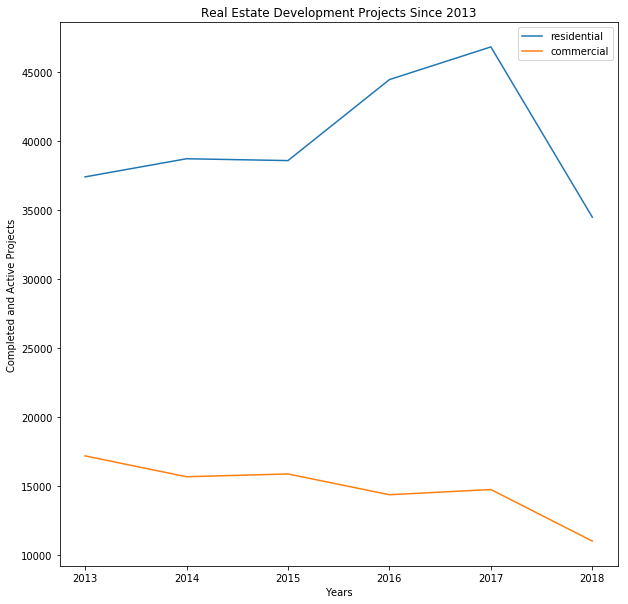

In [30]:
# extracting commerical projects per year
commercial_df = final_5y_DF.loc[final_5y_DF['PermitClass_Commercial'] == True, : ]
commercial_grouped = commercial_df.groupby("CalendarYearIssued")
comm_count = commercial_grouped['PermitClass_Commercial'].count()
comm_list = comm_count.tolist()
years = comm_count.keys()

# extracting residential projects per year
residential_df = final_5y_DF.loc[final_5y_DF['PermitClass_Residential'] == True, : ]
residential_grouped = residential_df.groupby("CalendarYearIssued")
res_count = residential_grouped['PermitClass_Residential'].count()
res_list = res_count.tolist()

# plot data
plt.plot(years, res_list, label = 'residential')
plt.plot(years, comm_list, label = 'commercial')

# plot elements
plt.title("Real Estate Development Projects Since 2013")
plt.xlabel("Years")
plt.ylabel("Completed and Active Projects")
plt.legend(loc='best')
plt.rcParams['figure.figsize']=(10,10)

# Save Figure
plt.savefig("resources/Residential_vs_Commercial_Calendar_Year_Series_Plot.png")
plt.show()

## Completed Permits (New vs Remodel) in Austin since 2013

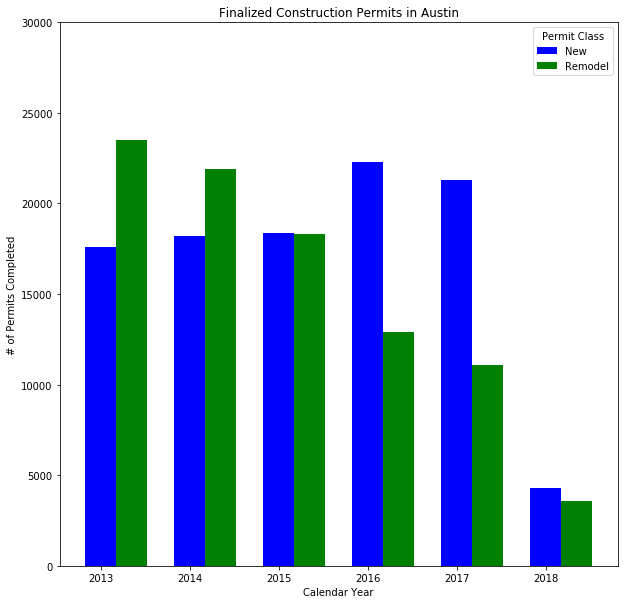

In [31]:
# only look at records where the permit StatusCurrent states "Final" to look at construction jobs that were actually completed
z_finalized_permits_df = filtered_5y_DF[filtered_5y_DF['StatusCurrent'] == "Final"]

# only look at records where the permit WorkClass states "New" to look at only new construction jobs that were actually completed
z_new_finalized_permits_df = z_finalized_permits_df[z_finalized_permits_df['WorkClass'] == "New"]

# only look at records where the permit WorkClass states "Remodel" or "Addition or Remodel" to look at only remodel construction jobs that were actually completed
z_remodel_finalized_permits_df = z_finalized_permits_df[(z_finalized_permits_df['WorkClass'] == "Remodel") | (z_finalized_permits_df['WorkClass'] == "Addition and Remodel")]

#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many new permits were finalized and completed in each calendar year
z_new_permits_by_year_count = z_new_finalized_permits_df.groupby("CalendarYearIssued")["PermitType"].count()

# put all of the new permits by year count values into a list to use later in plot
z_new_permits_completed_by_year = z_new_permits_by_year_count.tolist()

#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many Remodel permits were finalized and completed in each calendar year
z_remodel_permits_by_year_count = z_remodel_finalized_permits_df.groupby("CalendarYearIssued")["PermitType"].count()

# put all of the remodel permits by year count values into a list to use later in plot
z_remodel_permits_completed_by_year = z_remodel_permits_by_year_count.tolist()

#create a list that holds the value of the years being looked to use later in plot
z_years_list = filtered_5y_DF["CalendarYearIssued"].unique()

# Build the plots for new permits by calendar year issued and remodel permits by calendar year issued

# x-axis for the two different scatter plots should be years_list
# y-axis for the two different scatter plots should be new_permits_completed_by_year and remodel_permits_completed_by_year

#label for x-axis
plt.xlabel("Calendar Year")
#label for y-axis
plt.ylabel("# of Permits Completed")

width = 0.35       # the width of the bars

z_new_permits_bar  = plt.bar(z_years_list, z_new_permits_completed_by_year, width, color="b", align="center", label="New")
z_remodel_permits_bar  = plt.bar(z_years_list+width, z_remodel_permits_completed_by_year, width, color = "g", align="center", label="Remodel")

# add title to legend and location
lgnd = plt.legend(handles = [z_new_permits_bar, z_remodel_permits_bar], loc="upper right", title="Permit Class")

# make title
plt.title("Finalized Construction Permits in Austin")

# The y limits of our plot is to 0 to 30000
plt.ylim(0, 30000)
plt.rcParams['figure.figsize']=(10,10)

# Save Figure
plt.savefig("resources/Permits_New_vs_Remodel_Calendar_Year_Bar_Plot.png")

plt.show()

## Breakdown of completed new permits - residential and commercial

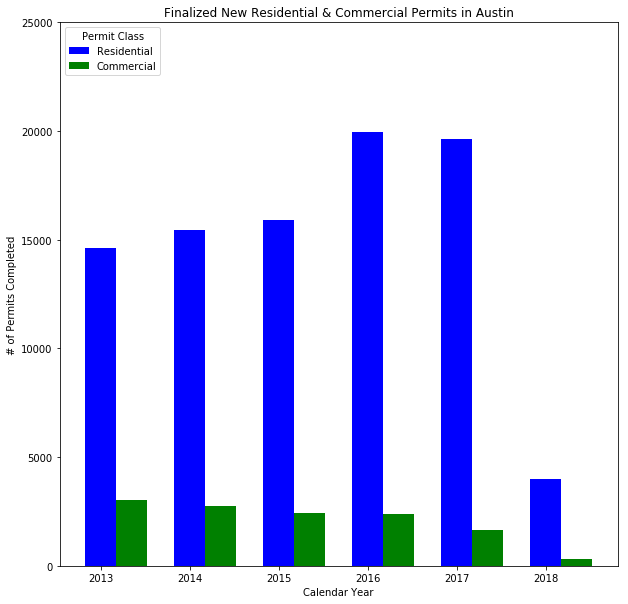

In [32]:
# take the new finalized permits data frame and then grab only the residential ones
# the residential ones come from the PermitClass field and they all start with "R"
z_new_finalized_permits_residential_df = z_new_finalized_permits_df.loc[z_new_finalized_permits_df["PermitClass"].str.startswith("R")]

#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many new residential permits were finalized and completed in each calendar year
z_new_finalized_permits_residential_by_year_count = z_new_finalized_permits_residential_df.groupby("CalendarYearIssued")["PermitType"].count()

# put all of the new residential permits by year count values into a list to use later in plot
z_new_permits_residential_completed_by_year = z_new_finalized_permits_residential_by_year_count.tolist()

# take the new finalized permits data frame and then grab only the commercial ones
# the commercial ones come from the PermitClass field and they all start with "C"
z_new_finalized_permits_commercial_df = z_new_finalized_permits_df.loc[z_new_finalized_permits_df["PermitClass"].str.startswith("C")]

#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many new commercial permits were finalized and completed in each calendar year
z_new_finalized_permits_commercial_by_year_count = z_new_finalized_permits_commercial_df.groupby("CalendarYearIssued")["PermitType"].count()

# put all of the new commercial permits by year count values into a list to use later in plot
z_new_permits_commercial_completed_by_year = z_new_finalized_permits_commercial_by_year_count.tolist()

# Build the plots for new permits by calendar year issued and remodel permits by calendar year issued

# x-axis for the two different scatter plots should be years_list
# y-axis for the two different scatter plots should be new_permits_completed_by_year and remodel_permits_completed_by_year

#label for x-axis
plt.xlabel("Calendar Year")
#label for y-axis
plt.ylabel("# of Permits Completed")

width = 0.35       # the width of the bars

z_new_permits_residential_bar  = plt.bar(z_years_list, z_new_permits_residential_completed_by_year, width, color="b", align="center", label="Residential")
z_new_permits_commercial_bar  = plt.bar(z_years_list+width, z_new_permits_commercial_completed_by_year, width, color = "g", align="center", label="Commercial")

# add title to legend and location
lgnd = plt.legend(handles = [z_new_permits_residential_bar, z_new_permits_commercial_bar], loc="upper left", title="Permit Class")

# make title
plt.title("Finalized New Residential & Commercial Permits in Austin")

# The y limits of our plot is to 0 to 25000
plt.ylim(0, 25000)
plt.rcParams['figure.figsize']=(10,10)

# Save Figure
plt.savefig("resources/Permits_New_Residential_vs_Commercial_Calendar_Year_Bar_Plot.png")

plt.show()

## Breakdown of completed remodel permits - residential and commercial

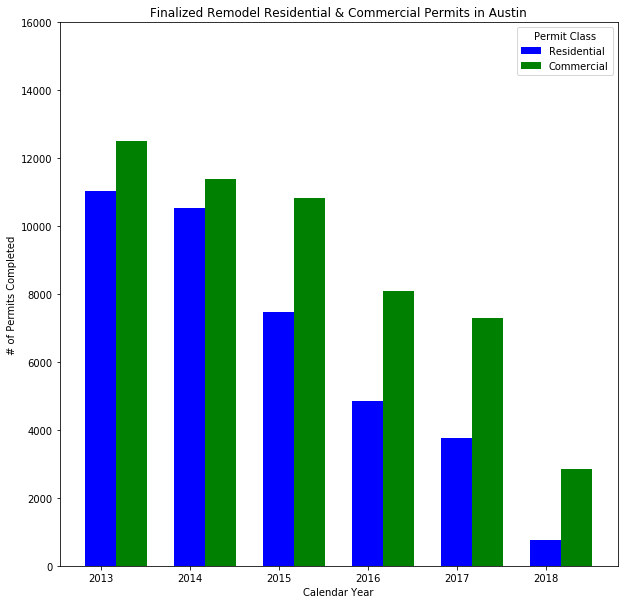

In [33]:
# take the remodel finalized permits data frame and then grab only the residential ones
# the residential ones come from the PermitClass field and they all start with "R"
z_remodel_finalized_permits_residential_df = z_remodel_finalized_permits_df.loc[z_remodel_finalized_permits_df["PermitClass"].str.startswith("R")]

#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many new residential permits were finalized and completed in each calendar year
z_remodel_finalized_permits_residential_by_year_count = z_remodel_finalized_permits_residential_df.groupby("CalendarYearIssued")["PermitType"].count()

# put all of the remodel residential permits by year count values into a list to use later in plot
z_remodel_permits_residential_completed_by_year = z_remodel_finalized_permits_residential_by_year_count.tolist()

# take the remodel finalized permits data frame and then grab only the commercial ones
# the commercial ones come from the PermitClass field and they all start with "C"
z_remodel_finalized_permits_commercial_df = z_remodel_finalized_permits_df.loc[z_remodel_finalized_permits_df["PermitClass"].str.startswith("C")]

#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many remodel commercial permits were finalized and completed in each calendar year
z_remodel_finalized_permits_commercial_by_year_count = z_remodel_finalized_permits_commercial_df.groupby("CalendarYearIssued")["PermitType"].count()

# put all of the remodel commercial permits by year count values into a list to use later in plot
z_remodel_permits_commercial_completed_by_year = z_remodel_finalized_permits_commercial_by_year_count.tolist()

# Build the plots for remodel permits by calendar year issued and remodel permits by calendar year issued

# x-axis for the two different scatter plots should be years_list
# y-axis for the two different scatter plots should be remodel_permits_residential_completed_by_year and remodel_permits_commercial_completed_by_year

#label for x-axis
plt.xlabel("Calendar Year")
#label for y-axis
plt.ylabel("# of Permits Completed")

width = 0.35       # the width of the bars

z_remodel_permits_residential_bar  = plt.bar(z_years_list, z_remodel_permits_residential_completed_by_year, width, color="b", align="center", label="Residential")
z_remodel_permits_commercial_bar  = plt.bar(z_years_list+width, z_remodel_permits_commercial_completed_by_year, width, color = "g", align="center", label="Commercial")

# add title to legend and location
lgnd = plt.legend(handles = [z_remodel_permits_residential_bar, z_remodel_permits_commercial_bar], loc="upper right", title="Permit Class")

# make title
plt.title("Finalized Remodel Residential & Commercial Permits in Austin")

# The y limits of our plot is to 0 to 16000
plt.ylim(0, 16000)
plt.rcParams['figure.figsize']=(10,10)

# Save Figure
plt.savefig("resources/Permits_Remodel_Residential_vs_Commercial_Calendar_Year_Bar_Plot.png")

plt.show()

## Attempt to use gmaps to map projects-- graph doesn't output

In [34]:
# Store 'Lat' and 'Lng' into  locations
locations = final_5y_DF[["Latitude", "Longitude"]].astype(float)

# dropping the handful of rows with no coords.
locs = locations.dropna(axis=0, how='any')

# Create project points layer attempt#1-- does not output

# test location to map
test = [(locs['Latitude'][0] , locs['Longitude'][0])]

projects_layer = gmaps.symbol_layer(
    test, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2)

fig = gmaps.figure()
fig.add_layer(projects_layer)

fig

Figure(layout=FigureLayout(height='420px'))

## Simple Scatter Plots of Recent Austin Area Development Projects
### Note: might need to run cell TWICE for graph to size corrextly

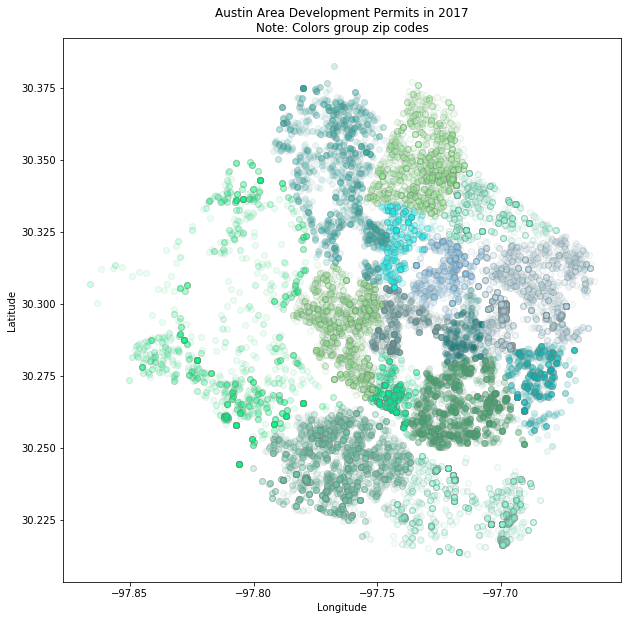

In [35]:
# filtered to single year
yr2017_df = final_5y_DF.loc[final_5y_DF['CalendarYearIssued'] == 2017]

zips = [
    78701,
    78702,
    78703,
    78704,
    78705,
    78712,
    78722,
    78721,
    78723,
    78751,
    78752,
    78756,
    78757,
    78731,
    78746,
    78741
]

colors = [
    'mediumspringgreen', 
    'mediumseagreen', 
    'lightgreen',
    'mediumaquamarine',
    'cadetblue',
    'turquoise',
    'teal',
    'c',
    'lightblue', 
    'lightskyblue',
    'aquamarine',
    'aqua',
    'palegreen',
    'lightseagreen',
    'springgreen',
    'aquamarine',
]

for z, c in zip(zips, colors):
    # filter df to zip
    map_2017_DF = yr2017_df.loc[yr2017_df['OriginalZip'] == z, : ]

    # pull coords
    y_lat = map_2017_DF['Latitude'].tolist()
    x_long = map_2017_DF['Longitude'].tolist()

    # add to matplotlib scatter plot
    plt.scatter(x_long, y_lat, marker="o", facecolors= c,edgecolors="grey", alpha=.10)

# Plot elements
plt.title('''Austin Area Development Permits in 2017
Note: Colors group zip codes''')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.rcParams['figure.figsize']=(10,10)

# Save Figure
plt.savefig("resources/Map_scatter_2017_projects.png")

# Prints the scatter plot to the screen
plt.show()

![Title](resources/central_austin.png)

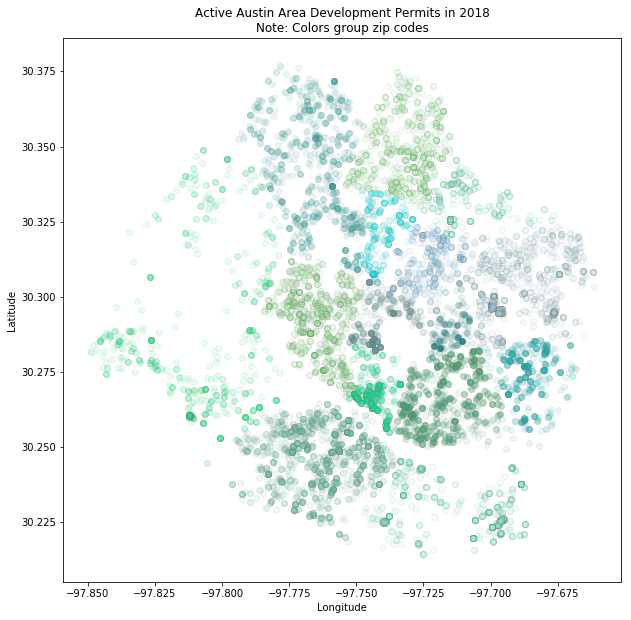

In [38]:
# filtered to single year
yr2018_df = final_5y_DF.loc[(final_5y_DF['CalendarYearIssued'] == 2018) & (final_5y_DF['StatusCurrent'] == 'Active'), : ]

zips = [
    78701,
    78702,
    78703,
    78704,
    78705,
    78712,
    78722,
    78721,
    78723,
    78751,
    78752,
    78756,
    78757,
    78731,
    78746,
    78741
]

colors = [
    'mediumspringgreen', 
    'mediumseagreen', 
    'lightgreen',
    'mediumaquamarine',
    'cadetblue',
    'turquoise',
    'teal',
    'c',
    'lightblue', 
    'lightskyblue',
    'aquamarine',
    'aqua',
    'palegreen',
    'lightseagreen',
    'springgreen',
    'aquamarine',
]

for z, c in zip(zips, colors):
    # filter df to zip
    map_2018_DF = yr2018_df.loc[yr2018_df['OriginalZip'] == z, : ]

    # pull coords
    y_lat = map_2018_DF['Latitude'].tolist()
    x_long = map_2018_DF['Longitude'].tolist()

    # add to matplotlib scatter plot
    plt.scatter(x_long, y_lat, marker="o", facecolors= c, edgecolors="grey", alpha=.10)

# Prints the scatter plot to the screen
plt.title('''Active Austin Area Development Permits in 2018
Note: Colors group zip codes''')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.rcParams['figure.figsize']=(10,10)

# Save Figure
plt.savefig("resources/Map_scatter_Active_2018_projects.png")

# Prints the scatter plot to the screen
plt.show()

## Identifying which areas in Austin are building the most new condominiums

C:\Users\zmsub\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


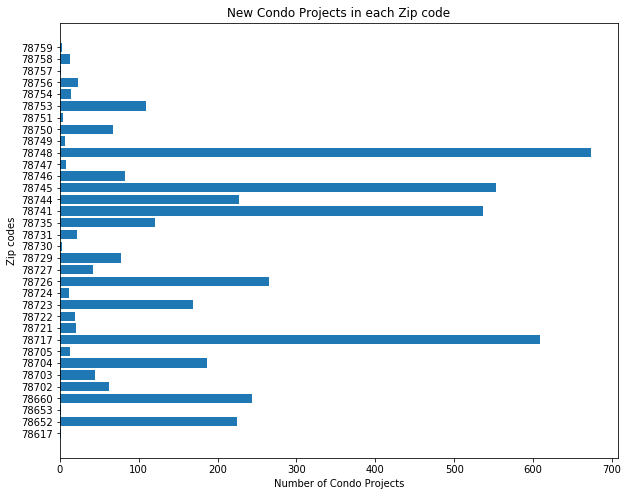

In [39]:
# Only Condominium == Yes
# Condo_5y_status_df = filtered_5y_status_df.loc[(filtered_5y_status_df['Condominium'] == 'Yes')]
# altering the above to not duplicate code
Condo_5y_status_df = final_5y_DF.loc[(final_5y_DF['Condominium'] == 'Yes')]

# Reduce columns
Condo_5y_Columns_df = Condo_5y_status_df[[
    'Description',
    'CalendarYearIssued',
    'Condominium', 
    'OriginalZip',
    'StatusCurrent']]

# Make zip code an integer
Condo_5y_Columns_df["OriginalZip"] = Condo_5y_Columns_df["OriginalZip"].astype(int)

# # there are 34 zip codes
# Condo_5y_Columns_df = Condo_5y_Columns_df["OriginalZip"].unique()
# Condo_5y_Columns_df

# Group by zip code and count
Grouped_Condo_5y_Columns_df = Condo_5y_Columns_df.groupby(['OriginalZip']).count()

# Order zip codes
Grouped_Order_Condo_5y_Columns_df = Grouped_Condo_5y_Columns_df.sort_values(["OriginalZip"], ascending=True)
Grouped_Order_Condo_5y_Columns_df.head()

# where condos are being permitted to be built  
# Make a bar graph, with a bar for each zip code...see 1.7 Matplotlib
labels = Grouped_Order_Condo_5y_Columns_df.index.values
y = Grouped_Order_Condo_5y_Columns_df['Description']

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)
ax.barh(np.arange(0, 34, 1), y, align = 'center')  
ax.set_yticks(np.arange(0, 34, 1))
ax.set_yticklabels(labels)

# Give our chart some labels and a tile
plt.title("New Condo Projects in each Zip code")
plt.xlabel("Number of Condo Projects")
plt.ylabel("Zip codes")

# plt.savefig("Resources/CondoLocations.png")
# updated the save path
plt.savefig("resources/CondoLocations.png")
plt.show()

![austin_metro_zipmap](resources/austin_metro_zipmap.png)